## Sistemas con un grado de Libertad sobreamortiguado

#### Problema.

Un sistema de un grado de libertad tiene las propiedades siguientes: m =
0.2533 kip-s2/pulg, k = 10 kips/pulg. Determine las respuesta y(t), y'(t), y''(t) en vibración libre con
amortiguamiento debido a una velocidad inicial de 40 cm/s con ξ = 2.00.



Solución:

In [13]:
# Importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
# Iniciamos las variables
m = 0.2533  # masa
k = 10  # rigidez
v0 = 40  # velocidad inicial en cm/s
y0 = 0  # desplazamiento inicial en cm
e = 2.00  # razón de amortiguamiento  

tf = 5.0  # tiempo de análisis para el gráfico
tt = 0.3  # tiempo de análisis para los datos en tabla
dt = 0.02 # intervalo de tiempo

Cálculos:

In [3]:
w = (k/m)**0.5  # Frecuencia natural angular (rad/s)
T = 2*np.pi/w  #  Periodo de la estructura
# wd = w*(1-e**2)**0.5 # Frecuencia del sistema con amortiguación

In [5]:
t = np.arange(0,tf+dt,dt) # creamos un vector con el tiempo


#### Ecuación de Movimiento

$$ y(t) = \frac{v_0 e^{-\xi \omega_n t}}{2\omega_n \sqrt{\xi^2-1}} 
\left(e^{\omega_n \sqrt{\xi^2-1}t}-e^{-\omega_n \sqrt{\xi^2-1}t} \right )
$$

In [8]:
# Ecuación de movimiento
# y = lambda t: np.exp(-e*w*t)*(y0*np.cos(wd*t) + (v0 + y0*e*w)*np.sin(wd*t)/wd)

y = lambda t: (v0*np.exp(-e*w*t)/(2*w*np.sqrt(e**2-1)))*(np.exp(w * np.sqrt(e**2-1)*t) - np.exp(-w * np.sqrt(e**2-1)*t))

# Aproximaremos las derivadas con:
h = 0.0000001
df = lambda t: (y(t+h)-y(t))/h  # Primera derivada
df2 = lambda t: (df(t+h)-df(t))/h  # Segunda derivada

In [23]:
# Resultados del desplazamiento
ttt = np.arange(0, tt + dt, dt) # creamos un vector con el tiempo para la tabla
Df = pd.DataFrame({"t(s)":ttt,"y":y(ttt),"v":df(ttt),"a":df2(ttt)})
Df

,t(s),y,v,a
0,0.00,0.000000,39.999950,-1005.374836
1,0.02,0.627138,23.969581,-627.176089
2,0.04,0.998733,13.975361,-390.643073
3,0.06,1.211138,7.756416,-242.694753
4,0.08,1.324614,3.898302,-150.213175
5,0.10,1.376839,1.516127,-92.414965
6,0.12,1.391363,0.056306,-56.354921
7,0.14,1.382903,-0.827468,-33.728575
8,0.16,1.360643,-1.351824,-19.717561
9,0.18,1.330312,-1.652261,-11.080026


Text(0, 0.5, 'Desplazamiento (cm)')

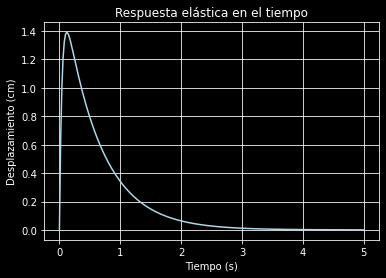

In [10]:
# Graficamos  el Desplazamiento
plt.style.use('dark_background')
plt.plot(t,y(t),color='lightblue')
plt.grid()
plt.title("Respuesta elástica en el tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Desplazamiento (cm)")

Text(0, 0.5, 'Velocidad (cm/s)')

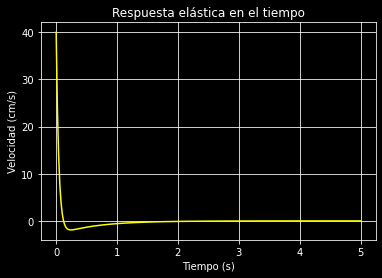

In [11]:
# Graficamos  la velocidad
plt.plot(t,df(t),color='yellow')
plt.grid()
plt.title("Respuesta elástica en el tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (cm/s)")

Text(0, 0.5, 'Aceleración ($cm/s^2$)')

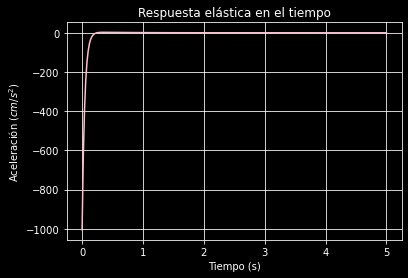

In [12]:
# Graficamos  la aceleración
plt.plot(t,df2(t),color='pink')
plt.grid()
plt.title("Respuesta elástica en el tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Aceleración ($cm/s^2$)")